# Проект: Обучение с учителем: качество модели

<a id='section_id'></a>
## Содержание 
[1. Описание исследования](#section_id1)

[____1.1. Описание данных](#section_id2)

[____1.2. Цель исследования](#section_id3)

[____1.3. Ход исследования](#section_id4)

[2. Загрузка данных](#section_id5)

[____2.1. Загрузка данных из файлов](#section_id6)

[____2.2. Проверка данных на соответствие описанию](#section_id7)

[3. Предобработка данных](#section_id8)

[____3.1. Работа с названиями столбцов](#section_id9)

[____3.2. Обработка пропусков](#section_id10)

[____3.3. Обработка дубликатов](#section_id11)
    
[____3.4. Преобразование типов данных](#section_id12)

[____3.5. Прочие корректировки](#section_id13)

[4. Исследовательский анализ данных](#section_id14)

[____4.1. Статистический анализ признаков](#section_id15)

[____4.2. Графики признаков](#section_id16)

[____4.3. Отбор клиентов с покупательской активностью не менее трёх месяцев](#section_id17)

[____4.4. Выводы о данных](#section_id18)

[5. Объединение таблиц](#section_id19)

[____5.1. Объединение таблиц с данными](#section_id20)

[____5.2. Создание столбца периода](#section_id21)

[6. Корреляционный анализ](#section_id22)

[____6.1. Коэффициенты корреляции](#section_id23)
    
[____6.2. Устранение мультиколлинеарности](#section_id24)

[7. Использование пайплайнов](#section_id25)
    
[____7.1. Обработка количественных и категориальных признаков](#section_id26)

[____7.2. Обучение моделей](#section_id27)

[____7.3. Выбор лучшей модели](#section_id28)
    
[8. Анализ важности признаков](#section_id29)
    
[____8.1. Оценка важности признаков](#section_id30)

[____8.2. Выводы о значимости](#section_id31)
    
[9. Сегментация покупателей](#section_id32)
    
[____9.1. Сегментация покупателей](#section_id33)

[____9.2. Предложения по увеличению покупательной активности группы покупателей](#section_id34)

[____9.3. Вывод о сегментах](#section_id35)
    
[10. Общий вывод](#section_id36)

<a id='section_id1'></a>
## 1. Описание исследования
[к содержанию](#section_id)

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и  продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
На основе анализа данных и бизнес-моделирования необходимо предложить решение по работе с клиентами с целью их удержания.

<a id='section_id2'></a>
### 1.1 Описание данных
[к содержанию](#section_id)

<img src=https://pictures.s3.yandex.net/resources/image_1695485033.png alt="Data features pic" width="800" height="800">

**market_file.csv**

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

*id* — номер покупателя в корпоративной базе данных.

*Покупательская активность* — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».

*Тип сервиса* — уровень сервиса, например «премиум» и «стандарт».

*Разрешить сообщать* — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.

*Маркет_актив_6_мес* — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.

*Маркет_актив_тек_мес* — количество маркетинговых коммуникаций в текущем месяце.

*Длительность* — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.

*Акционные_покупки* — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.

*Популярная_категория* — самая популярная категория товаров у покупателя за последние 6 месяцев.

*редний_просмотр_категорий_за_визит* — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.

*Неоплаченные_продукты_штук_квартал* — общее число неоплаченных товаров в корзине за последние 3 месяца.

*шибка_сервиса* — число сбоев, которые коснулись покупателя во время посещения сайта.

*Страниц_за_визит* — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

**market_money.csv**

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

*id* — номер покупателя в корпоративной базе данных.

*Период* — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.

*Выручка* — сумма выручки за период.

**market_time.csv**

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

*id* — номер покупателя в корпоративной базе данных.

*Период* — название периода, во время которого зафиксировано общее время.

*минут* — значение времени, проведённого на сайте, в минутах.

**money.csv**

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

*id* — номер покупателя в корпоративной базе данных.

*Прибыль* — значение прибыли.

<a id='section_id3'></a>
### 1.2. Цель исследования
[к содержанию](#section_id)

Разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность

<a id='section_id4'></a>
### 1.3. Ход исследования
[к содержанию](#section_id)

1. Промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».
2. Собрать данные по клиентам по следующим группам:
- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.
3. Построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
4. В исследование включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
5. Используя данные модели и данные о прибыльности клиентов, выделить сегменты покупателей и разработать для них персонализированные предложения.

In [1]:
# установка библиотек
!pip install shap -q
!pip install deep_translator -q
!pip install phik -q
!pip install yellowbrick -q

In [2]:
# импорт библиотек
import pandas as pd
import numpy as np

# импорт моделей для подготовки и обработки данных
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from phik.report import plot_correlation_matrix
from phik import phik_matrix

# импорт моделей машинного обучения
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# импорт инструментов управления ресурсами
import joblib
import time

# импорт инструментов поиска
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# импорт метрик
from sklearn.metrics import roc_auc_score
from yellowbrick.classifier.rocauc import roc_auc

# импорт инструментов анализа
import shap
from sklearn.inspection import permutation_importance

# импорт графических библиотек
from matplotlib import pyplot as plt
import seaborn as sns

# импорт переводчика
from deep_translator import GoogleTranslator

In [3]:
# создание констант RANDOM_STATE и TEST_SIZE
RANDOM_STATE = 42
TEST_SIZE = 0.25

<a id='section_id5'></a>
## 2. Загрузка данных
[к содержанию](#section_id)

<a id='section_id6'></a>
### 2.1. Загрузка данных из файлов
[к содержанию](#section_id)

In [4]:
# функция для обзора данных
def preview(dataset):
    '''Функция принимает на вход набор данных и выводит основную информацию о нем.'''
    display(dataset.head())
    print(dataset.info())
    display(dataset.describe(include='all'))

In [5]:
# загрузка данных о покупателях
market = pd.read_csv('/datasets/market_file.csv')

In [6]:
# загрузка данных о выручке
market_money = pd.read_csv('/datasets/market_money.csv')

In [7]:
# загрузка данных о времени
market_time = pd.read_csv('/datasets/market_time.csv')

In [8]:
# загрузка данных о прибыли
money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')

<a id='section_id7'></a>
### 2.2. Проверка данных на соответствие описанию
[к содержанию](#section_id)

In [9]:
# проверка данных о покупателях
preview(market)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300,1300,1300,1300.000000,1300.000000,1300.000000,1300.000000,1300,1300.00000,1300.000000,1300.000000,1300.000000
unique,NaN,2,3,2,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,NaN,Прежний уровень,стандарт,да,NaN,NaN,NaN,NaN,Товары для детей,NaN,NaN,NaN,NaN
freq,NaN,802,914,962,NaN,NaN,NaN,NaN,330,NaN,NaN,NaN,NaN
mean,215997.500000,NaN,NaN,NaN,4.253769,4.011538,601.898462,0.319808,NaN,3.27000,2.840000,4.185385,8.176923
std,375.421985,NaN,NaN,NaN,1.014814,0.696868,249.856289,0.249843,NaN,1.35535,1.971451,1.955298,3.978126
min,215348.000000,NaN,NaN,NaN,0.900000,3.000000,110.000000,0.000000,NaN,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,NaN,NaN,NaN,3.700000,4.000000,405.500000,0.170000,NaN,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,NaN,NaN,NaN,4.200000,4.000000,606.000000,0.240000,NaN,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,NaN,NaN,NaN,4.900000,4.000000,806.000000,0.300000,NaN,4.00000,4.000000,6.000000,11.000000


In [10]:
# проверка данных о выручке
preview(market_money)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None


,id,Период,Выручка
count,3900.000000,3900,3900.000000
unique,NaN,3,NaN
top,NaN,препредыдущий_месяц,NaN
freq,NaN,1300,NaN
mean,215997.500000,NaN,5025.696051
std,375.325686,NaN,1777.704104
min,215348.000000,NaN,0.000000
25%,215672.750000,NaN,4590.150000
50%,215997.500000,NaN,4957.500000
75%,216322.250000,NaN,5363.000000


In [11]:
# проверка данных о времени
preview(market_time)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None


,id,Период,минут
count,2600.000000,2600,2600.000000
unique,NaN,2,NaN
top,NaN,текущий_месяц,NaN
freq,NaN,1300,NaN
mean,215997.500000,NaN,13.336154
std,375.349754,NaN,4.080198
min,215348.000000,NaN,4.000000
25%,215672.750000,NaN,10.000000
50%,215997.500000,NaN,13.000000
75%,216322.250000,NaN,16.000000


In [12]:
# проверка данных о прибыли
preview(money)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB
None


,id,Прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


**Вывод:** в файлах действительно представлены данные о покупателях, выручке, времени, проведенном на сайте и прибыли. Методом info() не обнаружено пропусков. В данных о прибыли обработан разделитель ";" и десятичный разделитель в виде ","

<a id='section_id8'></a>
## 3. Предобработка данных
[к содержанию](#section_id)

<a id='section_id9'></a>
### 3.1. Работа с названиями столбцов
[к содержанию](#section_id)

In [13]:
# функция для перевода названий столбцов и установка нижнего регистра
def translate(vals):
    translations = []
    for val in vals:
        translations.append(GoogleTranslator(source='auto', target='en').translate(val).lower().replace(' ', '_'))
    return translations

In [14]:
# корректировка названий столбцов данных о пользователях
market.columns = translate(market.columns)
if 'market_active_tech_mes' in market.columns.tolist():
    market = market.rename(columns={'market_active_tech_mes' : 'market_active_current_month'})
market.head(2)

,id,buying_activity,service_type,allow_reporting,market_active_6_months,market_active_current_month,duration,promotional_purchases,popular_category,average_category_views_per_visit,unpaid_products_pieces_quarter,service_error,pages_per_visit
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5


In [15]:
# корректировка названий столбцов данных о выручке
market_money.columns = translate(market_money.columns)
market_money.head(2)

# переименование названия столбца с периодами
market_money = market_money.rename(columns={'period' : 'period_revenue'})

In [16]:
# корректировка названий столбцов данных о времени на сайте
market_time.columns = translate(market_time.columns)
market_time.head(2)

# переименование названия столбца с периодами
market_time = market_time.rename(columns={'period' : 'period_minutes'})

In [17]:
# корректировка названий столбцов данных о времени на сайте
money.columns = translate(money.columns)
money.head(2)

,id,profit
0,215348,0.98
1,215349,4.16


<a id='section_id10'></a>
### 3.2. Обработка пропусков
[к содержанию](#section_id)

In [18]:
# обнаружение пропусков в данных о покупателях
market.isna().sum()

id                                  0
buying_activity                     0
service_type                        0
allow_reporting                     0
market_active_6_months              0
market_active_current_month         0
duration                            0
promotional_purchases               0
popular_category                    0
average_category_views_per_visit    0
unpaid_products_pieces_quarter      0
service_error                       0
pages_per_visit                     0
dtype: int64

In [19]:
# обнаружение пропусков в данных о выручке
market_money.isna().sum()

id                0
period_revenue    0
revenue           0
dtype: int64

In [20]:
# обнаружение пропусков в данных о времени
market_time.isna().sum()

id                0
period_minutes    0
minutes           0
dtype: int64

In [21]:
# обнаружение пропусков в данных о прибыли
money.isna().sum()

id        0
profit    0
dtype: int64

**Вывод:** в данных нет пропусков

<a id='section_id11'></a>
### 3.3. Обработка дубликатов
[к содержанию](#section_id)

In [22]:
# обнаружение явных дубликатов в данных о покупателях
market.duplicated().sum()

0

In [23]:
# обнаружение явных дубликатов в данных о выручке
market_money.duplicated().sum()

0

In [24]:
# обнаружение явных дубликатов в данных о времени
market_time.duplicated().sum()

0

In [25]:
# обнаружение явных дубликатов в данных о прибыли
money.duplicated().sum()

0

**Вывод:** явных дубликатов в данных не обнаружено

In [26]:
# проверка неявных дубликатов в наборе данных о покупателях
market.duplicated(subset=['buying_activity', 'service_type', 'allow_reporting',
       'market_active_6_months', 'market_active_current_month', 'duration',
       'promotional_purchases', 'popular_category',
       'average_category_views_per_visit', 'unpaid_products_pieces_quarter',
       'service_error', 'pages_per_visit']).sum()

11

In [27]:
# удаление неявны дубликатов в данных о пользователях
print(f'Размер market до удаления: {len(market)}')
market = market.drop_duplicates(subset=['buying_activity', 'service_type', 'allow_reporting',
       'market_active_6_months', 'market_active_current_month', 'duration',
       'promotional_purchases', 'popular_category',
       'average_category_views_per_visit', 'unpaid_products_pieces_quarter',
       'service_error', 'pages_per_visit'])
print(f'Размер market после удаления: {len(market)}')

Размер market до удаления: 1300
Размер market после удаления: 1289


In [28]:
# проверка неявных дубликатов в наборе данных о выручке
market_money.duplicated(subset=['id' , 'period_revenue']).sum()

0

In [29]:
# проверка неявных дубликатов в наборе данных о времени
market_time.duplicated(subset=['id' , 'period_minutes']).sum()

0

In [30]:
# проверка неявных дубликатов в наборе данных о прибыли
money.duplicated(subset=['id']).sum()

0

**Вывод:** устранено 11 неявных дубликатов в наборе данных о покупателях

<a id='section_id12'></a>
### 3.4. Преобразование типов данных
[к содержанию](#section_id)

**Вывод:** для корректного чтения файлов было достаточно задания аргументов функции read_csv(), дополнительного преобразование типов значений столбцов выполнять не нужно.

<a id='section_id13'></a>
### 3.5. Прочие корректировки
[к содержанию](#section_id)

In [31]:
# проверка значений 'service_type'
print(market['service_type'].unique())

['премиум' 'стандартт' 'стандарт']


In [32]:
# исправление значений 'стандартт' на 'стандарт' в наборах данных
market['service_type'] = market['service_type'].str.replace('стандартт', 'стандарт')

In [33]:
# исправление опечатки в названии периода
market_time['period_minutes'] = market_time['period_minutes'].str.replace('предыдцщий_месяц', 'предыдущий_месяц')
market.head()

,id,buying_activity,service_type,allow_reporting,market_active_6_months,market_active_current_month,duration,promotional_purchases,popular_category,average_category_views_per_visit,unpaid_products_pieces_quarter,service_error,pages_per_visit
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


**Вывод по этапу:** в результате предобработки данных, изменены названия признаков в соответствии с "хорошим стилем", проверены пропуски, удалено 11 неявных дубликатов в наборе данных о покупателях, исправлены опечатки в столбцах 'service_type' и 'period_minutes. Осталось 1289 объектов в наборе данных о покупателях

<a id='section_id14'></a>
## 4. Исследовательский анализ данных
[к содержанию](#section_id)

<a id='section_id15'></a>
### 4.1. Статистический анализ признаков
[к содержанию](#section_id)

In [34]:
# статистический анализ признаков данных о покупателях
market.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,1289.0,NaN,NaN,NaN,215998.33204,376.912982,215348.0,215670.0,216003.0,216325.0,216647.0
buying_activity,1289,2,Прежний уровень,802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
service_type,1289,2,стандарт,914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
allow_reporting,1289,2,да,955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
market_active_6_months,1289.0,NaN,NaN,NaN,4.250892,1.01648,0.9,3.7,4.2,4.9,6.6
market_active_current_month,1289.0,NaN,NaN,NaN,4.00931,0.697093,3.0,4.0,4.0,4.0,5.0
duration,1289.0,NaN,NaN,NaN,601.836307,249.923803,110.0,404.0,606.0,806.0,1079.0
promotional_purchases,1289.0,NaN,NaN,NaN,0.320155,0.250085,0.0,0.17,0.24,0.3,0.99
popular_category,1289,6,Товары для детей,327,NaN,NaN,NaN,NaN,NaN,NaN,NaN
average_category_views_per_visit,1289.0,NaN,NaN,NaN,3.279286,1.355761,1.0,2.0,3.0,4.0,6.0


Среднемесячное количество маркетинговых взаимодействий с покупателями за поледние 6 месяцев составляет около 4.2 раза, минимально 0 раз, максимально 6.6 раз.

В текущем месяце среднемесячное значение таких взаимодействий снизилось до 4, но не осталось клиентов, которым не направлялись маркетинговые предложения ни разу.

В среднем покупатель зарегистрирован на сайте 606 дней. Пользуется акциями в 24% случаев. Просматривает 3 товарных категории, хранит в корзине 3 неоплаченных товара. Покупатель в среднем просматривает 8 товарных страниц и сталкивается с 4 сбоями.

В основном клиенты сохраняют прежний уровень покупательской активности, пользуются стандартным типом сервиса, разрешают присылать материалы о товаре. Самая популярная категория в интернет магазине - товары для детей

In [35]:
# статистический анализ признаков данных о выручке
market_money.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3900.0,NaN,NaN,NaN,215997.5,375.325686,215348.0,215672.75,215997.5,216322.25,216647.0
period_revenue,3900,3,препредыдущий_месяц,1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
revenue,3900.0,NaN,NaN,NaN,5025.696051,1777.704104,0.0,4590.15,4957.5,5363.0,106862.2


Медианное значение выручки за период 4958 рублей.

In [36]:
# статистический анализ признаков в данных о времени
market_time.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,2600.0,NaN,NaN,NaN,215997.5,375.349754,215348.0,215672.75,215997.5,216322.25,216647.0
period_minutes,2600,2,предыдущий_месяц,1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minutes,2600.0,NaN,NaN,NaN,13.336154,4.080198,4.0,10.0,13.0,16.0,23.0


Медианное время одного посещения 13 минут.

Среднемесячное значение прибыли от покупателя за период в 3 месяца 4.05.

<a id='section_id16'></a>
### 4.2. Графики признаков
[к содержанию](#section_id)

In [37]:
# функция для построения графиков признаков
def plt_chart(data, kind, cols):
    '''функция принимает на вход набор данных и список столбцов признаков,
    строит графики заданного типа.'''
    data_pos = data[data['buying_activity'] == 'Снизилась']
    data_neg = data[data['buying_activity'] == 'Прежний уровень']
    fig, ax = plt.subplots(nrows=2, ncols=int(len(cols)/2), figsize=(15, 15))
    
    for i, row in enumerate(ax):
        for j, col in enumerate(row):
            col = cols[int(len(cols)/2*i+j)]
            ser1 = data_pos[col]
            ser2 = data_neg[col]
            try:
                ser1.plot(ax=ax[i,j],
                         kind=kind,
                         title=col,
                         xlabel=col,
                         ylabel=col,
                         alpha=0.7,)
                ser2.plot(ax=ax[i,j],
                         kind=kind,
                         title=col,
                         xlabel=col,
                         ylabel=col,
                         alpha=0.7)
            except:
                ser1.value_counts().plot(ax=ax[i,j],
                         kind=kind,
                         title=col,
                         xlabel=col,
                         ylabel=col,
                         alpha=0.7)
                ser2.value_counts().plot(ax=ax[i,j],
                         kind=kind,
                         title=col,
                         xlabel=col,
                         ylabel=col,
                         alpha=0.7)
    plt.tight_layout()
    plt.show()

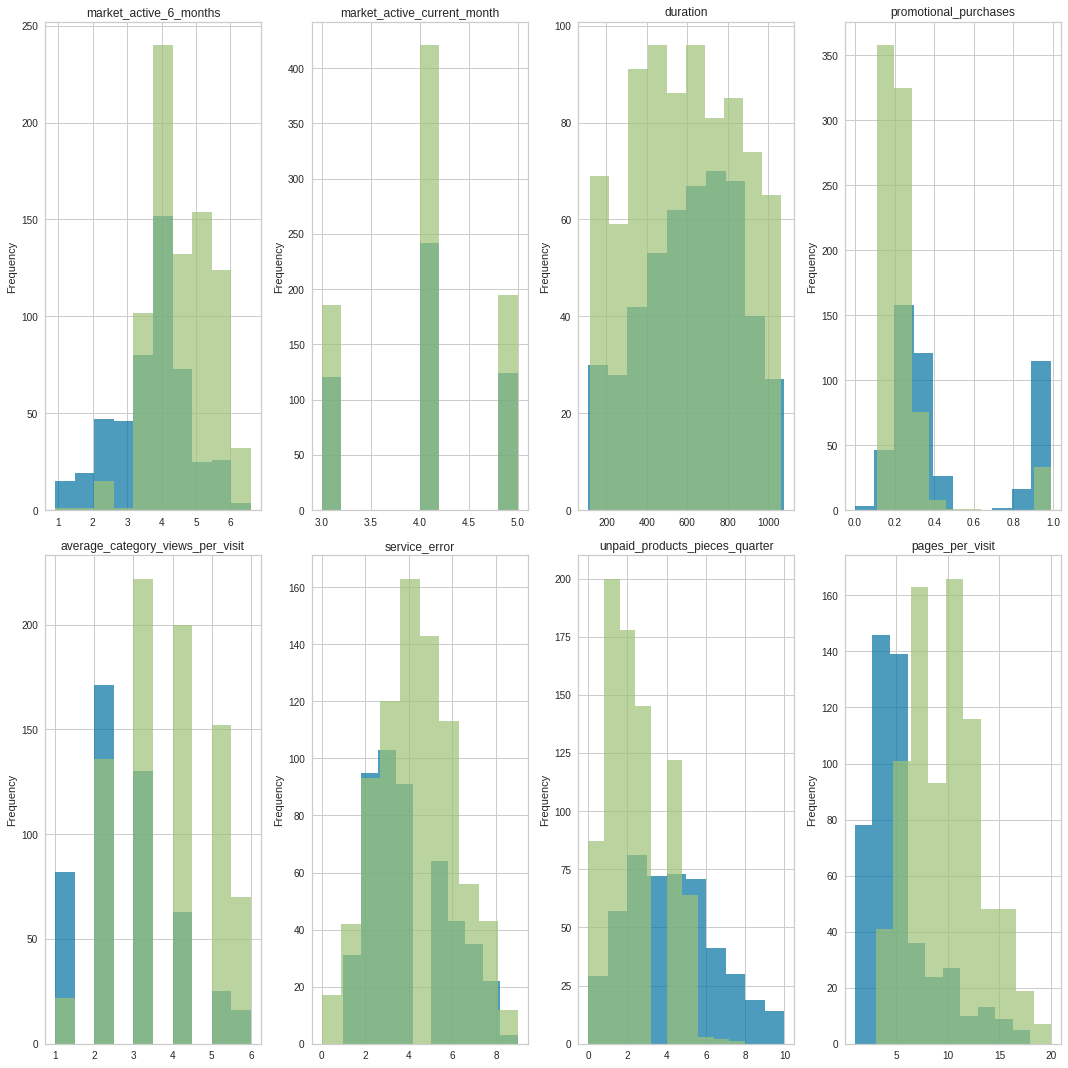

In [38]:
# построение гистограмм количественных признаков набора данных о покупателях
market_num_cols = ['market_active_6_months',
                   'market_active_current_month',
                   'duration',
                   'promotional_purchases',
                   'average_category_views_per_visit',
                   'service_error',
                   'unpaid_products_pieces_quarter',
                   'pages_per_visit']

# гистограммы признаков данных о покупателях
plt_chart(market, 'hist', market_num_cols)

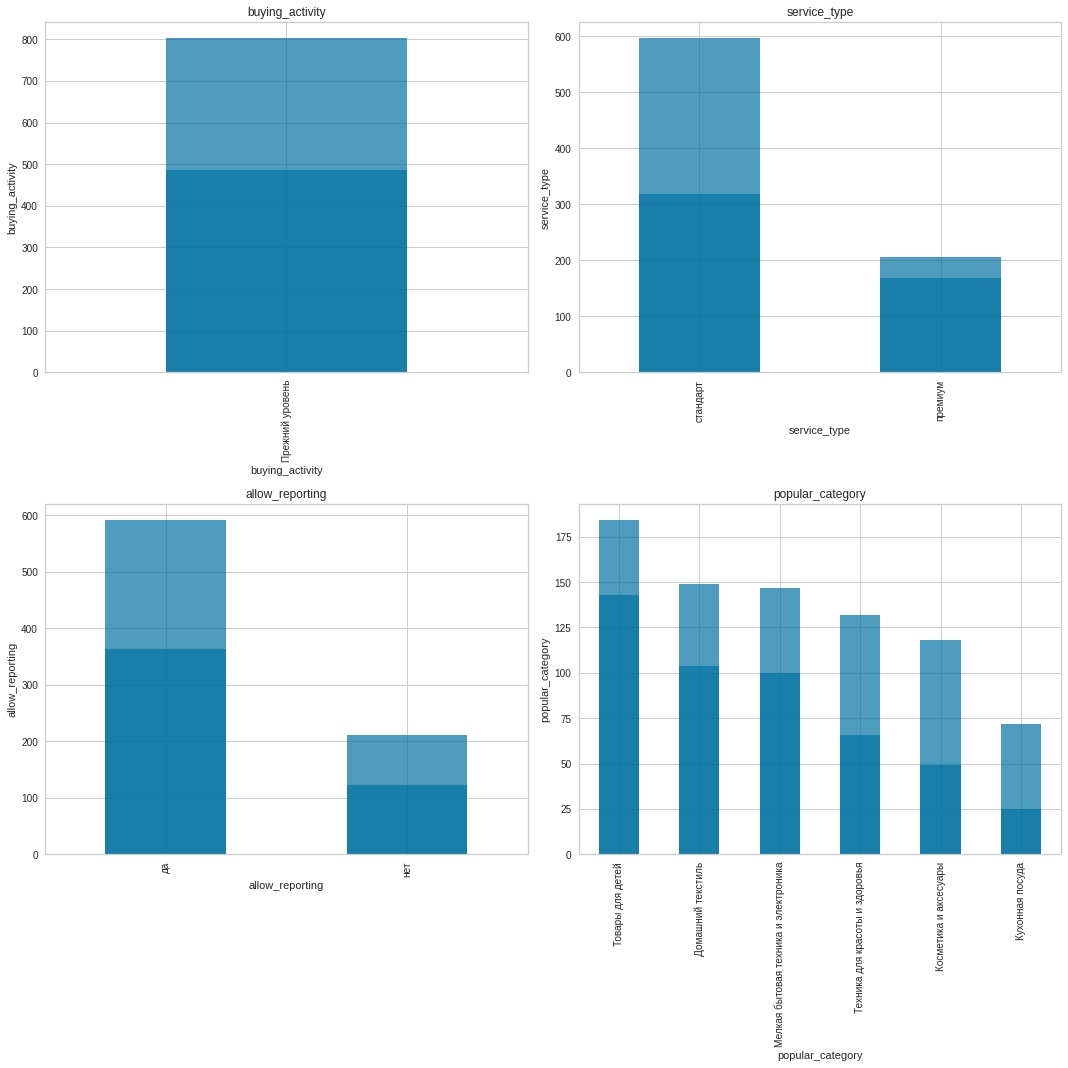

In [39]:
# построение столбчатых диаграмм категориальных признаков набора данных о покупателях
market_cat_cols = ['buying_activity',
                   'service_type',
                   'allow_reporting',
                   'popular_category']

plt_chart(market, 'bar', market_cat_cols)

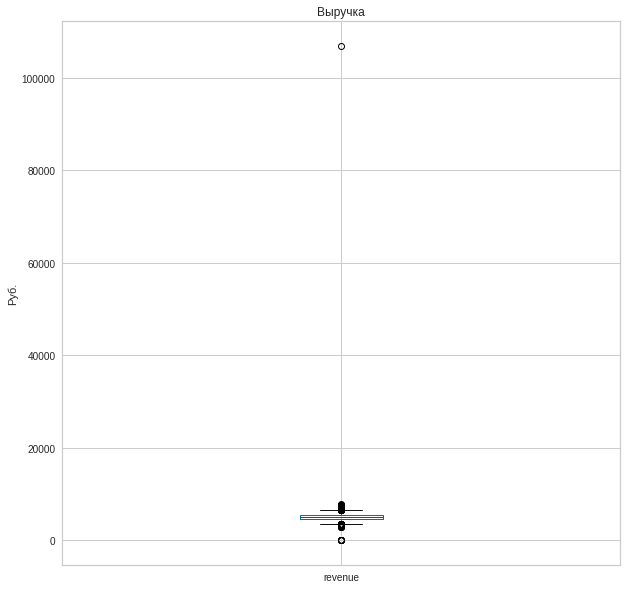

In [40]:
# построение диаграммы размаха выручки
market_money['revenue'].plot(kind='box',
                            title='Выручка',
                            xlabel='Выручка',
                            ylabel='Руб.',
                            figsize=(10, 10))
plt.show()

Существует аномально большое значение выручки, удалим это значение для корректности исследования

In [41]:
len(market_money['id'].unique())

1300

In [42]:
# удаление пользователя с аномальной выручкой
id_max_rev = market_money[market_money['revenue'] == market_money['revenue'].max()]['id'].iloc[0]
market_money = market_money[market_money['id'] != id_max_rev]

In [43]:
len(market_money['id'].unique())

1299

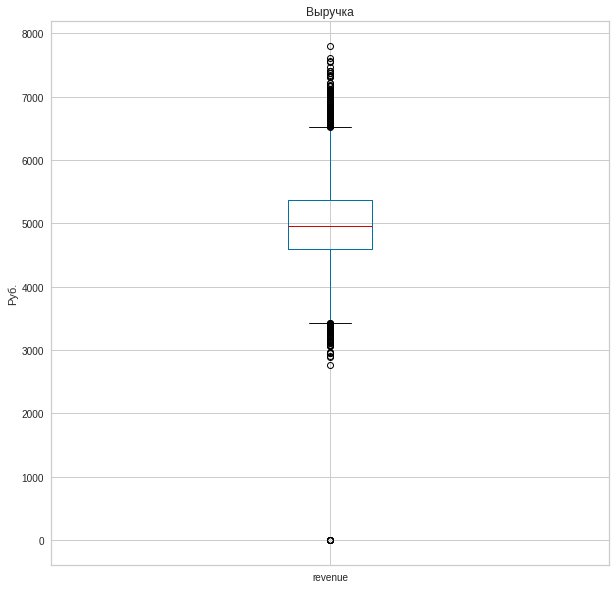

In [44]:
# повторное построение диаграммы размаха выручки
market_money['revenue'].plot(kind='box',
                            title='Выручка',
                            xlabel='Выручка',
                            ylabel='Руб.',
                            figsize=(10, 10))
plt.show()

In [45]:
# количество покупателей с нулевой выручкой
ids_0_rev = market_money[market_money['revenue'] == market_money['revenue'].min()]['id'].unique().tolist()
len(ids_0_rev)

3

Принято решение отбросить значения с нулевой выручкой, так как они нерепрезентативны для задачи машинного обучения.

In [46]:
len(market_money['id'].unique())

1299

In [47]:
# отбрасывание аномальных нулевых значений
market_money = market_money[~market_money['id'].isin(ids_0_rev)]

In [48]:
len(market_money['id'].unique())

1296

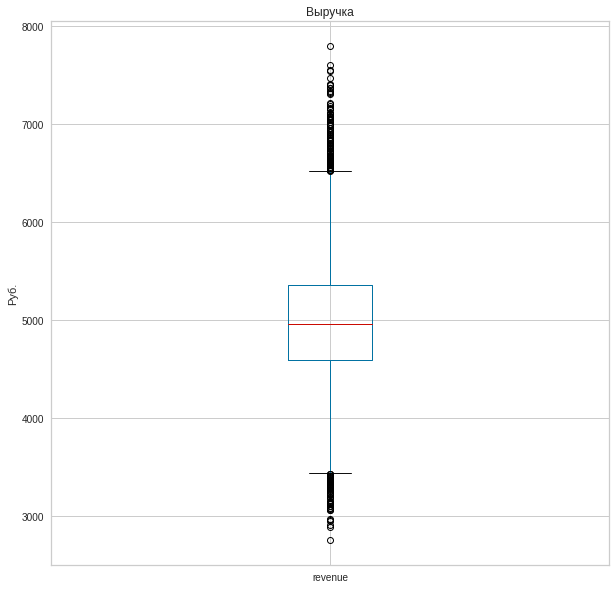

In [49]:
# повторное построение диаграммы размаха выручки
market_money['revenue'].plot(kind='box',
                            title='Выручка',
                            xlabel='Выручка',
                            ylabel='Руб.',
                            figsize=(10, 10))
plt.show()

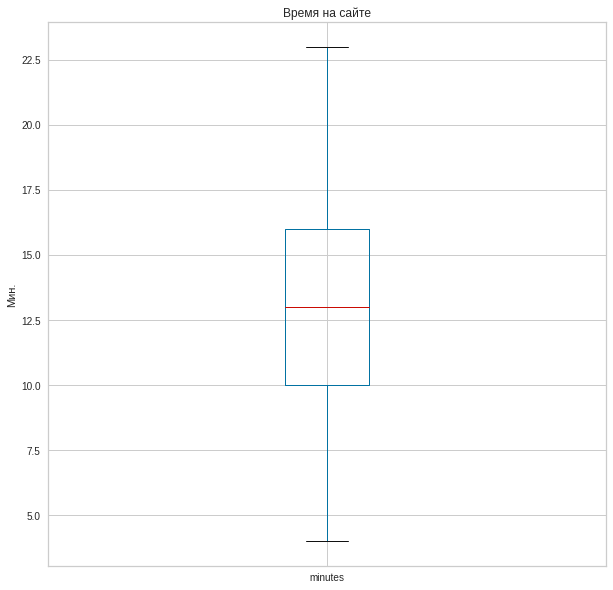

In [50]:
# построение диаграммы размаха количественного признака времени
market_time['minutes'].plot(kind='box',
                            title='Время на сайте',
                            xlabel='Время на сайте',
                            ylabel='Мин.',
                            figsize=(10, 10))
plt.show()

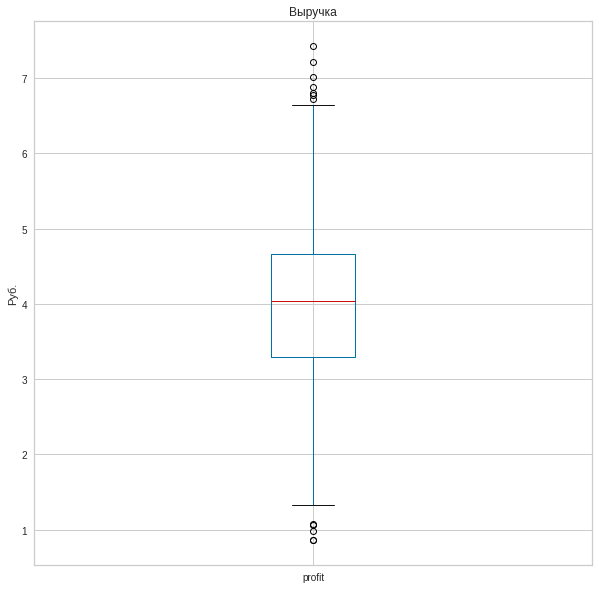

In [51]:
# построение диаграммы размаха количественного признака прибыли
money['profit'].plot(kind='box',
                            title='Выручка',
                            xlabel='Выручка',
                            ylabel='Руб.',
                            figsize=(10, 10))
plt.show()

<a id='section_id17'></a>
### 4.3. Отбор клиентов с покупательской активностью не менее трёх месяцев
[к содержанию](#section_id)

In [52]:
# отбор клиентов с покупательской активностью 3 месяца
market_money_active = market_money.pivot_table(index='id', 
                                         columns='period_revenue', 
                                         values='revenue', 
                                         aggfunc='sum').dropna()
market_money_active.columns = ['previous_month_revenue', 'preprevious_month_revenue', 'current_month_revenue']
market_money_active

,previous_month_revenue,preprevious_month_revenue,current_month_revenue
id,,,
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5
215353,4738.5,5124.0,5388.5
...,...,...,...
216643,3664.0,4704.0,4741.7
216644,4729.0,5299.0,5353.0
216645,5160.0,5334.0,5139.2


<a id='section_id18'></a>
### 4.4. Выводы о данных
[к содержанию](#section_id)

Среднемесячное количество маркетинговых взаимодействий с покупателями за поледние 6 месяцев составляет около 4.2 раза, минимально 0 раз, максимально 6.6 раз. У покупателей со снизившейся покупательской активностью в среднем 4 коммуникации, а у покупателей с прежним уровнем 6.

В текущем месяце среднемесячное значение таких взаимодействий снизилось до 4, но не осталось клиентов, которым не направлялись маркетинговые предложения ни разу. Снова данный признак показывает более высокие значения у клиентов, покупательская активность которых осталась на прежнем уровне.

Просмотров по категориям больше у тех покупателей, чья покупательская активность не снизилась. С сервисными ошибками чаще сталкиваются покупатели, чья активность на прежнем уровне. Неоплаченных покупок больше у покупателей, чья покупательская активность снизилась. Страниц за просмотр также больше у активных покупателей.

В среднем покупатель зарегистрирован на сайте 606 дней. Пользуется акциями в 24% случаев. Просматривает 3 товарных категории, хранит в корзине 3 неоплаченных товара. Покупатель в среднем просматривает 8 товарных страниц и сталкивается с 4 сбоями.

В основном клиенты сохраняют прежний уровень покупательской активности, пользуются стандартным типом сервиса, разрешают присылать материалы о товаре. Самая популярная категория в интернет магазине - товары для детей.

Медианное значение выручки за период 4958 рублей.

Медианное время одного посещения 13 минут.

Среднемесячное значение прибыли от покупателя за период в 3 месяца 4.05.

Удалены неявные дубликаты в наборе данных о покупателях и исправлены опечатки в столбцах 'service_type', 'period_minutes'.

Удалены аномально аномально большое значение выручки.

Из оставшихся данных отобраны покупатели с покупательской активностью в три месяца.

<a id='section_id19'></a>
## 5. Объединение таблиц
[к содержанию](#section_id)

<a id='section_id20'></a>
### 5.1. Объединение таблиц с данными
[к содержанию](#section_id)

In [53]:
#подготовка данных к объединению
market_ready = market.set_index('id')
market_time_active = market_time.pivot_table(index='id', 
                                      columns='period_minutes', 
                                      values='minutes', 
                                      aggfunc='sum').dropna()
market_time_active.columns = ['previous_month_minutes', 'current_month_minutes']

In [54]:
# объединим данные по активным пользователям из трёх датасетов
market_full = market_ready.join([market_money_active, market_time_active], how='inner')
market_full

,buying_activity,service_type,allow_reporting,market_active_6_months,market_active_current_month,duration,promotional_purchases,popular_category,average_category_views_per_visit,unpaid_products_pieces_quarter,service_error,pages_per_visit,previous_month_revenue,preprevious_month_revenue,current_month_revenue,previous_month_minutes,current_month_minutes
id,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18


<a id='section_id21'></a>
### 5.2. Создание столбца периода
[к содержанию](#section_id)

**Столбцы с периодами по выручке и времени на сайте были созданы на предыдущих этапах**

<a id='section_id22'></a>
## 6. Корреляционный анализ
[к содержанию](#section_id)

<a id='section_id23'></a>
### 6.1. Коэффициенты корреляции
[к содержанию](#section_id)

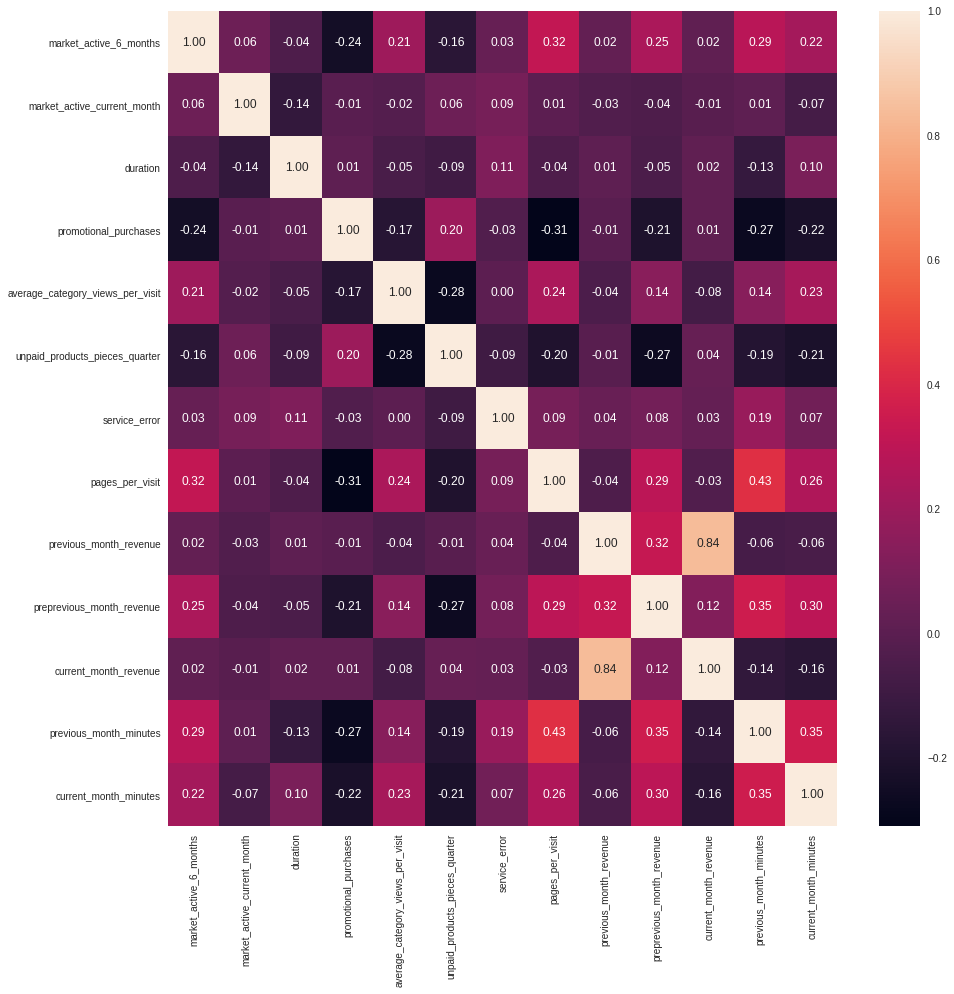

In [55]:
# построение тепловой карты признаков
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(market_full.corr(), annot=True, fmt='.2f', ax=ax)
plt.show()

**Выводы о мульти коллинеарности:** значения корреляции между признаками не поднимаются выше уровня 0.84, мультиколлинеарность отсутствует.

<a id='section_id24'></a>
### 6.2. Анализ phik
[к содержанию](#section_id)

interval columns not set, guessing: ['market_active_6_months', 'market_active_current_month', 'duration', 'promotional_purchases', 'average_category_views_per_visit', 'unpaid_products_pieces_quarter', 'service_error', 'pages_per_visit', 'previous_month_revenue', 'preprevious_month_revenue', 'current_month_revenue', 'previous_month_minutes', 'current_month_minutes']


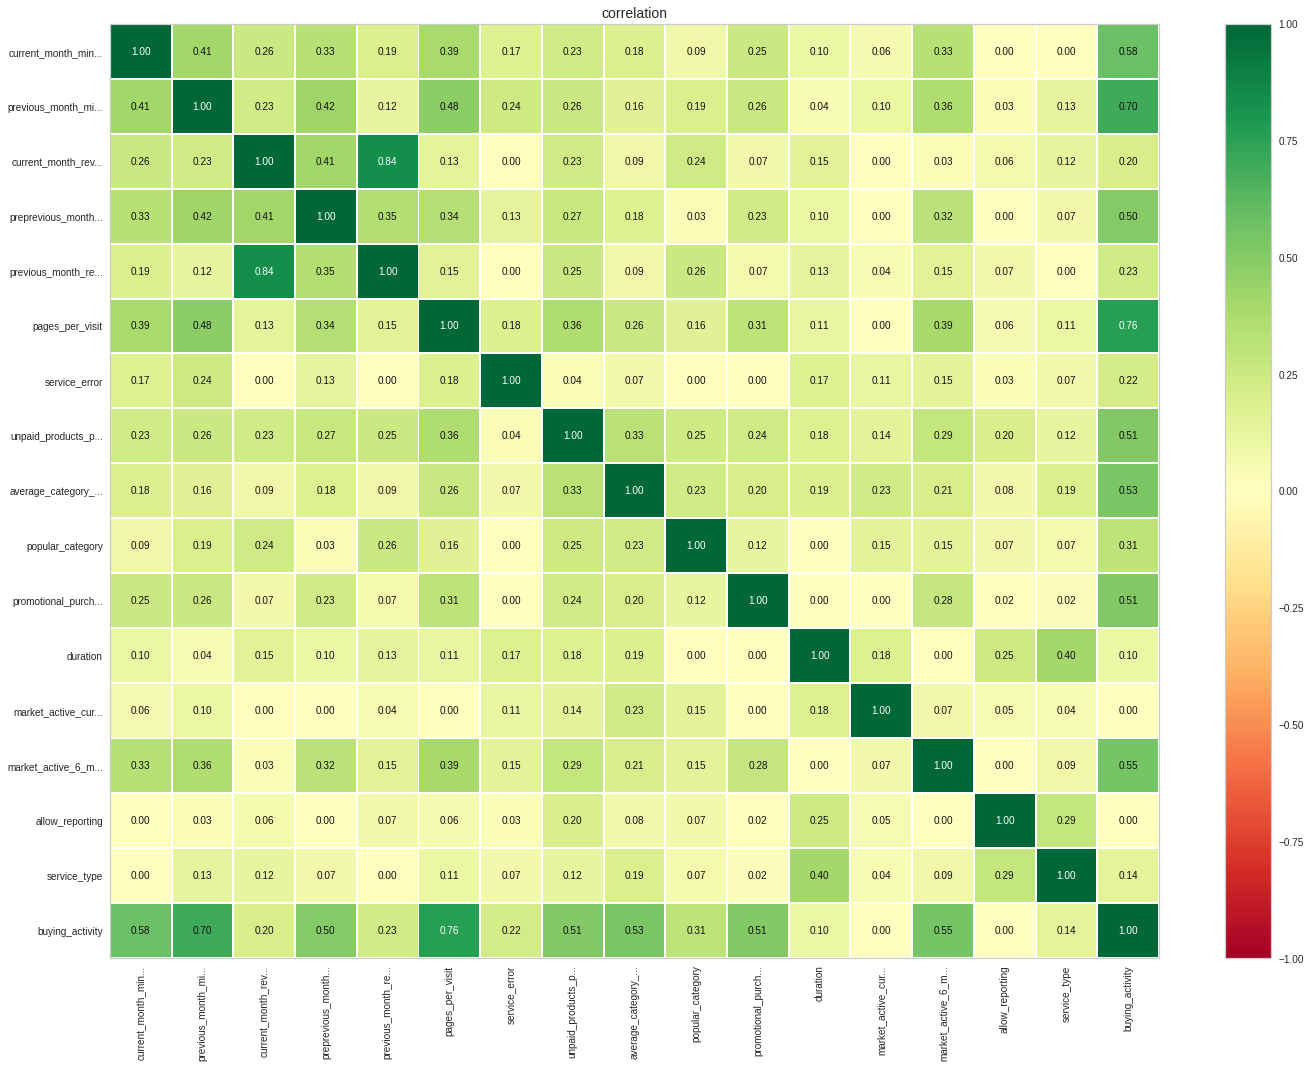

In [56]:
# построение phik матрицы
phik_overview = market_full.phik_matrix()

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    figsize=(20, 15)
)

**Выводы о корреляции признаков:** Yа снижение покупательской активности должны влиять значения признаков: 'pages_per_visit', 'previous_month_minutes', 'current_month_minutes', 'market_active_6_months', 'promotional_purchases'

<a id='section_id25'></a>
## 7. Использование пайплайнов
[к содержанию](#section_id)

In [57]:
# ручное кодирование целевого признака
market_full['buying_activity'] = market_full['buying_activity'].str.replace('Снизилась', '1')
market_full['buying_activity'] = market_full['buying_activity'].str.replace('Прежний уровень', '0')
market_full['buying_activity'] = market_full['buying_activity'].astype('int64')

In [58]:
# создание тренировочной и тестовой выборки
X_train, X_test, y_train, y_test = train_test_split(
    market_full.drop(['buying_activity'], axis=1),
    market_full['buying_activity'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = market_full['buying_activity'])

X_train.shape, X_test.shape

((963, 16), (322, 16))

In [59]:
# какие столбцы сейчас содержатся в market_full
market_full.head(1)

,buying_activity,service_type,allow_reporting,market_active_6_months,market_active_current_month,duration,promotional_purchases,popular_category,average_category_views_per_visit,unpaid_products_pieces_quarter,service_error,pages_per_visit,previous_month_revenue,preprevious_month_revenue,current_month_revenue,previous_month_minutes,current_month_minutes
id,,,,,,,,,,,,,,,,,
215349,1,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10


In [60]:
# создание списков с названиями признаков
ohe_columns = ['popular_category',
              'allow_reporting']
ord_columns = ['service_type']
num_columns = ['market_active_6_months', 
               'market_active_current_month', 
               'duration',
               'promotional_purchases', 
               'average_category_views_per_visit', 
               'unpaid_products_pieces_quarter', 
               'service_error', 
               'pages_per_visit',
               'current_month_revenue',
               'preprevious_month_revenue',
               'previous_month_revenue',
               'current_month_minutes',
               'previous_month_minutes']

<a id='section_id26'></a>
### 7.1. Обработка количественных и категориальных признаков
[к содержанию](#section_id)

In [61]:
# пайплайн для кодирования ohe_columns
ohe_pipe = Pipeline(
    [('ohe', OneHotEncoder(drop='first', handle_unknown='error', sparse_output=False))]
    )

In [62]:
# пайплайн для кодирования ord_columns
ord_pipe = Pipeline(
    [('ord',  OrdinalEncoder(categories=[['стандарт', 'премиум']]))]
    )

In [63]:
# общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

<a id='section_id27'></a>
### 7.2. Обучение моделей
[к содержанию](#section_id)

In [64]:
# итоговый пайплайн
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [65]:
# задание параметров для пайплайна
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_features': range(2, 5),
        'models__max_depth': range(2, 5),
        'models__min_samples_split': range(2, 5),
        'models__min_samples_leaf': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='liblinear',
            penalty='l1'
        )],
        'models__C': range(10, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    
    # словарь для модели SVC()
    {
        'models': [SVC(
            probability=True,
            random_state=RANDOM_STATE,
        )],
        'models__C': range(10, 15),
        'models__kernel': ['poly', 'rbf'],
        'models__degree': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

**Оценка вычислительной сложности:** всего получается более 100 параметров для перебора. Попробуем использовать метод поиска для перебора параметров.

**Выбор метрики для оценки качества:** для оценки качества обучения модели, мы можем использовать метрики:

- **accuracy** - доли классов не равны, не можем использовать эту метрику
- **precision_score** - оценит насколько мало модель оставляет FP значений, в данный момент нет задачи оценивать это значение
- **recall_score** - оценит насколько мало модель оставляет FN значений, в данный момент нет задачи оценивать это значение
- **f1_score** - комбинация precision и recall оценит то, можно учесть обе метрики, отдать предпочтение одной из них, но сейчас не совсем понятно какой
- **roc_auc** - можем использовать данную метрику. Её применяют, когда необходимо оценить качество работы модели вне зависимости от выбранного порога вероятности. Метрику можно использовать в случае, когда объектов с одним значением целевого признака больше, чем с другими.

Выбираем метрику ROC-AUC

In [66]:
# инициализация подбора параметров
grid_search = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

<a id='section_id28'></a>
### 7.3. Выбор лучшей модели
[к содержанию](#section_id)

In [67]:
# настройка библиотеки для работы с многопоточными вычислениями
joblib.parallel_backend('threading')

In [68]:
# запуск подбора параметров
start_time = time.time()
grid_search.fit(X_train, y_train)
total_time = time.time() - start_time

print(f"Время поиска: {total_time:.2f} seconds")
print('Лучшая модель и её параметры:\n\n', grid_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', grid_search.best_score_)

Время поиска: 85.03 seconds
Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['popular_category',
                                                   'allow_reporting']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[['стандарт',
                                                                                               'премиум']]))]),
                      

In [69]:
# оценка прогноза на тестовых данных
y_test_pred = grid_search.predict(X_test)

probabilities = grid_search.best_estimator_.predict_proba(X_test)
probabilities_one = probabilities[:, 1]
print('Площадь ROC-кривой:', roc_auc_score(y_test, probabilities_one))

Площадь ROC-кривой: 0.9195756753422969


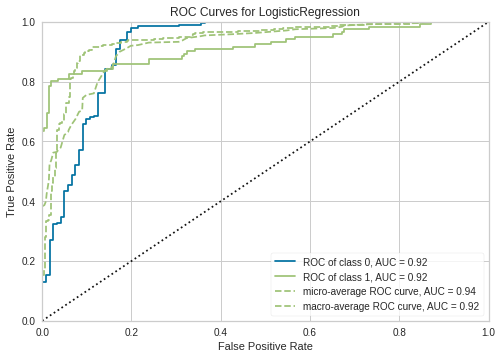

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=Pipeline(steps=[('preprocessor',
                                  ColumnTransformer(remainder='passthrough',
                                                    transformers=[('ohe',
                                                                   Pipeline(steps=[('ohe',
                                                                                    OneHotEncoder(drop='first',
                                                                                                  sparse_output=False))]),
                                                                   ['popular_category',
                                                                    'allow_reporting']),
                                                                  ('or...
                                                                    'duration',
                                                                    'promotional_purchases',
                                                                    'average_category_views_per_visit',
                                                                    'unpaid_products_pieces_quarter',
                                                                    'service_error',
                                                                    'pages_per_visit',
                                                                    'current_month_revenue',
                                                                    'preprevious_month_revenue',
                                                                    'previous_month_revenue',
                                                                    'current_month_minutes',
                                                                    'previous_month_minutes'])])),
                                 ('models',
                                  LogisticRegression(C=12, penalty='l1',
                                                     random_state=42,
                                                     solver='liblinear'))]))

In [70]:
# построение графика кривой ROC_AUC
roc_auc(grid_search.best_estimator_, X_test, y_test)

<a id='section_id29'></a>
## 8. Анализ важности признаков
[к содержанию](#section_id)

<a id='section_id30'></a>
### 8.1. Оценка важности признаков
[к содержанию](#section_id)

In [71]:
# оценка важности с помощью permutation impotrance
permutation = permutation_importance(grid_search.best_estimator_, X_test, y_test, scoring = 'roc_auc')
importances = permutation.importances_mean
imp = pd.DataFrame(data=importances.reshape(16, 1), 
                   columns=['importance'], 
                   index=X_train.columns).sort_values(by='importance')
imp

,importance
market_active_current_month,-8.716747e-04
previous_month_revenue,-3.453805e-04
service_type,0.000000e+00
allow_reporting,8.881784e-17
service_error,1.891370e-04
duration,1.471979e-03
unpaid_products_pieces_quarter,1.981826e-03
preprevious_month_revenue,2.475227e-03
current_month_revenue,3.667612e-03
popular_category,5.945479e-03


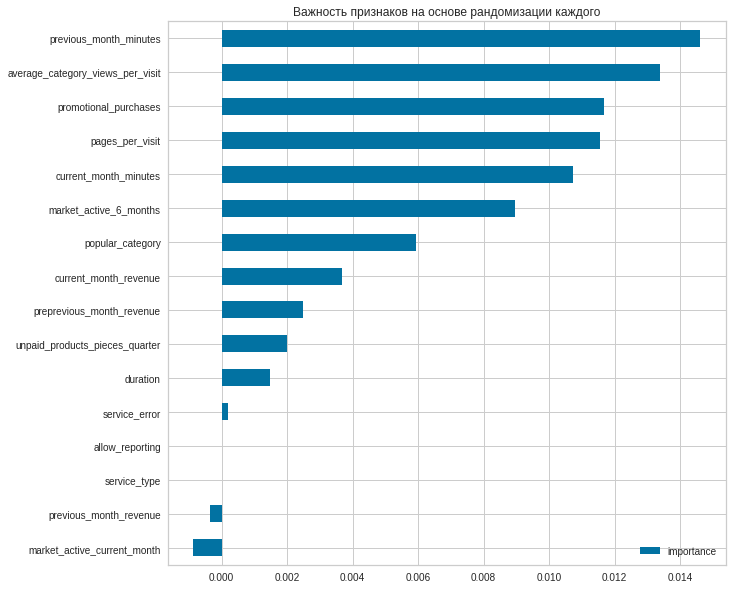

In [72]:
# построение диаграммы важности признаков
imp.plot(kind='barh', title='Важность признаков на основе рандомизации каждого', figsize=(10,10))
plt.show()

**Permutation importances** показывает, что важнейшими признаками являются pages_per_visit, previous_month_minutes, average_category_views, promotional_purchases и current_month_minutes

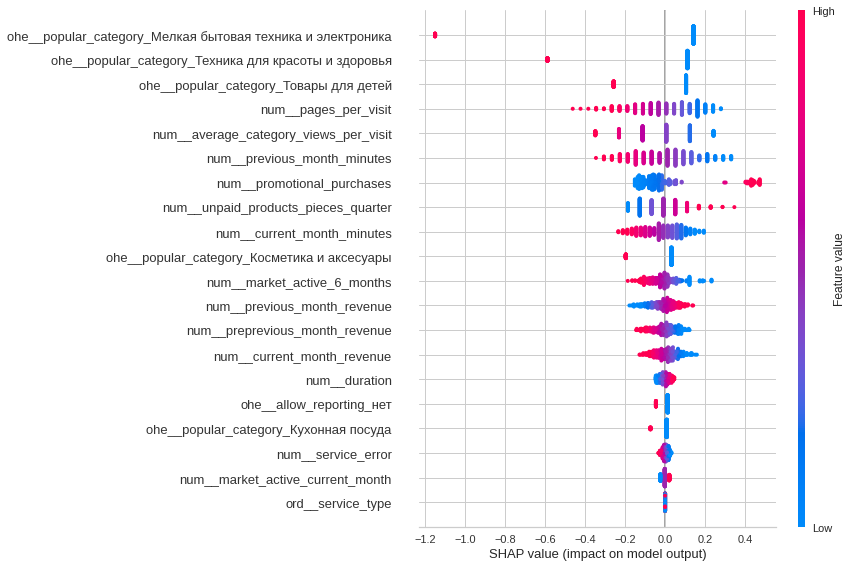

In [73]:
# построение графика важности признаков модели на основе shap
X_train_2 = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
explainer = shap.Explainer(grid_search.best_estimator_.named_steps['models'], X_train_2)
X_test_2 = pipe_final.named_steps['preprocessor'].transform(X_test)
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()
X_test_2 = pd.DataFrame(X_test_2, columns=feature_names)

shap_values = explainer(X_test_2)

shap.plots.beeswarm(shap_values, max_display=20) 

**Shap** также показывает, наибольшую важность признаков у pages_per_visit, previous_month_minutes, average_category_views, promotional_purchases и unpaid_products_pieces_quarter. Однако ohe признаки, созданные по категории "мелкая бытовая техника и электроника", "техника для красоты и здоровья", "товары для детей" показывают еще более высокие значения Шепли. Для покупателей, интересующихся этими категориями, данные признаки будут важны.

<a id='section_id31'></a>
### 8.2. Выводы о значимости
[к содержанию](#section_id)

<ins>Признаки, сильнее всего влияющие на целевой:</ins>

***pages_per_visit*** - сколько страниц за визит просматривает пользователь

***previous_month_minutes*** - сколько времени провел пользователь на сайте за предыдущий месяц

***average_category_views_per_visit*** - какое количество категорий в среднем просмотрел покупатель за визит

***promotional_purchases*** -  среднемесячная доля покупок по акции

**unpaid_products_pieces_quarter** - доля неоплаченных товаров в корзине

***current_month_minutes*** - время на сайте за текущий месяц


<ins>Малозначимые признаки:</ins>

***service_error*** - количество сбоев, которые коснулись покупателя

***allow_reporting*** - разрешить сообщения о товаре

***duration*** - дней прошло с момента регистрации покупателя на сайте


**Использование наблюдений при моделировании и принятии решений:**

Согласно результатом моделирования клиент со снижающейся активностью будет иметь меньшее число страниц за визит, он провёл меньше времени на сайте за предыдущий месяц, просматривает меньшее количество страниц в категории, имеет высокую долю покупок по акции, большее количество неоплаченных товаров в корзине и проводит на сайте меньше времени в текущем месяце.

Сильнее всего на отток с точки зрения поведения на сайте указывают признаки: время на сайте за предыдущий месяц
Этот признак можно рассматривать как индикатор снижения активности. Возможно, улучшения в работе сайта, могут повлиять на ситуацию с оттоком.

Сильнее всего на отток с точки зрения продуктового поведения указывают: количество категорий, просмотренных за визит, высокая доля покупок по акции, количество неоплаченных товаров в корзине. Данные признаки тоже можно рассматривать как индикатор снижения активности. Возможно, работа с продуктовыми категориями, изменение ценовой политики и пересмотр условий акций также могут уменьшить отток клиентов.

При дальнейщем моделировании, можно убрать из рассмотрения малозначимые признаки: service_error, allow_reporting, duration, так как они практически не влияют на целевой признак.

<a id='section_id32'></a>
## 9. Сегментация покупателей
[к содержанию](#section_id)

**Выбор сегмента:**
С точки зрения бинеса логично рассматривать клиентов, которые приносят наибольшую прибыль. Будем рассматривать клиентов с прибылью выше медианной, покупательская активность которых снизилась, чтобы понять, как уменьшить их отток и сильное падение прибыли.

<a id='section_id33'></a>
### 9.1. Сегментация покупателей
[к содержанию](#section_id)

In [74]:
# сегментация покупателей
high_profit_ids = money[money['profit'] >= money['profit'].median()]['id'].unique().tolist()
print('Количество покупателей с прибылью выше медианной:', len(high_profit_ids))

Количество покупателей с прибылью выше медианной: 650


In [75]:
# определение вероятностей принадлежности к классам
probabilities_market = grid_search.best_estimator_.predict_proba(market_full)[:, 1]

# определение выручки каждого пользователя
market_profit = money[money['id'].isin(market_full.index)].pivot_table(index='id', values='profit', aggfunc='sum')
market_pr = market_full.merge(market_profit, left_index=True, right_index=True)
market_pr['probability'] = probabilities_market
market_pr['segment'] = (market_pr['buying_activity'] == 1) & (market_pr.index.isin(high_profit_ids))
segment = market_pr[market_pr['segment'] == True]
non_segment = market_pr[market_pr['segment'] == False]

print('Количество покупателей в сегменте:', len(segment))

Количество покупателей в сегменте: 242


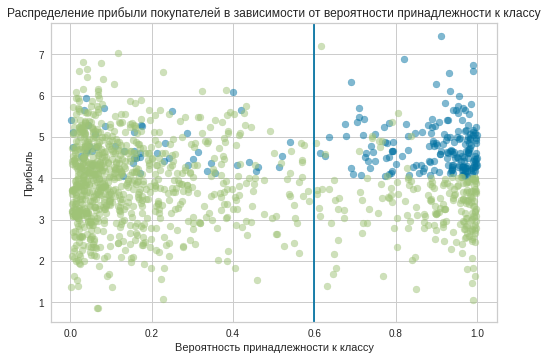

In [76]:
# графическое представление выбранной группы
plt.scatter(x=segment['probability'], 
                 y=segment['profit'],
                 alpha=0.5)
plt.scatter(x=non_segment['probability'], 
                 y=non_segment['profit'],
                 alpha=0.5)

plt.axvline(0.6)
plt.title('Распределение прибыли покупателей в зависимости от вероятности принадлежности к классу')
plt.xlabel('Вероятность принадлежности к классу')
plt.ylabel("Прибыль")
plt.show()

**Вывод по сегменту пользователей:** в выбранном сегменте наблюдается снижение прибыли при одновременном увеличении вероятности снижения пользовательской активности. Это справедливо при уровне вероятности больше 0.6. Рассмотрим, как изменилась выручка по категориям от периода к периоду.

In [77]:
# как менялись выручки по категориям в сегменте
seg_pivot = segment.pivot_table(index='popular_category',
                    values=['current_month_revenue', 'previous_month_revenue', 'preprevious_month_revenue'],
                    aggfunc='sum')
seg_pivot['diff_1'] = seg_pivot['previous_month_revenue'] - seg_pivot['preprevious_month_revenue']
seg_pivot['diff_2'] = seg_pivot['current_month_revenue'] - seg_pivot['previous_month_revenue']
seg_pivot

,current_month_revenue,preprevious_month_revenue,previous_month_revenue,diff_1,diff_2
popular_category,,,,,
Домашний текстиль,229268.1,195233.0,214595.0,19362.0,14673.1
Косметика и аксесуары,323368.7,270769.0,300451.0,29682.0,22917.7
Кухонная посуда,167536.7,136494.0,154492.5,17998.5,13044.2
Мелкая бытовая техника и электроника,69279.3,60924.0,67107.0,6183.0,2172.3
Техника для красоты и здоровья,110239.0,107619.0,103583.0,-4036.0,6656.0
Товары для детей,378190.6,359886.0,358616.5,-1269.5,19574.1


**Вывод:** Покупатели сегмента стали больше тратить в категориях 'Техника для красоты и здоровья' и 'Товары для детей', но меньше во всех остальных категориях. Рассмотрим признаки, отмеченные моделью, как наиболее важные для сравнения покупателей из сегмента и других при уровне вероятности больше 0.6

In [78]:
# отбор покупателей с уровнем вероятности больше 0.6
market_pr[market_pr['probability'] >= 0.6].pivot_table(index='segment', 
                                                       values=['pages_per_visit', 
                                                                'average_category_views_per_visit',
                                                                'unpaid_products_pieces_quarter',
                                                                'promotional_purchases'],
                                                       aggfunc='mean')

,average_category_views_per_visit,pages_per_visit,promotional_purchases,unpaid_products_pieces_quarter
segment,,,,
False,2.541063,4.589372,0.525652,4.193237
True,2.429319,4.193717,0.499110,4.010471


У покупателей из выбранного сегмента показатели по данным четырем признакам такие же как и у других покупателей с выбранным уровнем вероятности

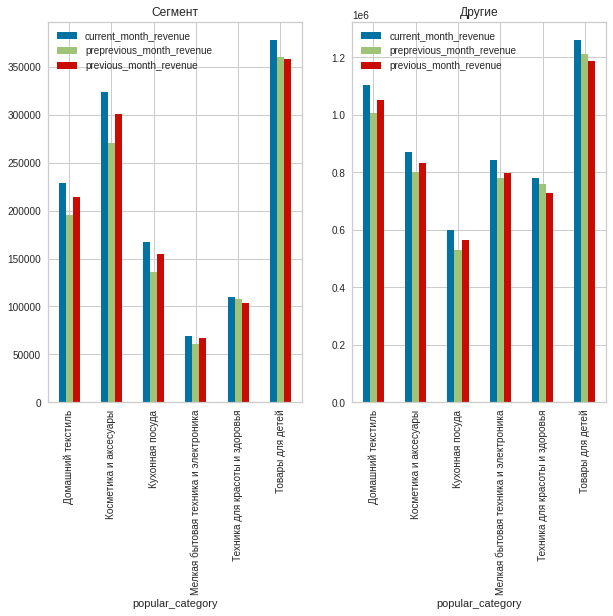

In [79]:
# сравним 2 диаграммы
fig, ax = plt.subplots(ncols=2, figsize=(10, 7))
seg_pivot = segment.pivot_table(index='popular_category',
                    values=['current_month_revenue', 'previous_month_revenue', 'preprevious_month_revenue'],
                    aggfunc='sum').plot(ax=ax[0], title='Сегмент', kind='bar')

non_segment = non_segment.pivot_table(index='popular_category',
                    values=['current_month_revenue', 'previous_month_revenue', 'preprevious_month_revenue'],
                    aggfunc='sum').plot(ax=ax[1], title='Другие', kind='bar')
plt.show()

На графиках заметно, что у покупателей, принадлежащих к сегменту, сравнительно ниже выручка в категориях 'Кухонная посуда', 'Мелкая бытовая техника и электроника', 'Техника для красоты и здоровья'. Причем модель машинного обучения отмечала, что снижение выручки по категориям 'Мелкая бытовая техника и электроника', 'Техника для красоты и здоровья' увеличивает вероятность снижения покупательской активности.

<a id='section_id34'></a>
### 9.2. Предложения по увеличению покупательной активности группы покупателей
[к содержанию](#section_id)

Возможные причины снижения активности сегмента такие же как и у других покупателей.

Индикаторам снижения активности служат признаки: average_category_views_per_visit, pages_per_visit, promotional_purchases, unpaid_products_pieces_quarter.

В сегменте теряют популярность все категории товаров кроме 'Мелкая бытовая техника и электроника', 'Техника для красоты и здоровья'.

Для поддержания покупательской активности данной группы, необходимо сделать так, чтобы у покупателей увеличилась выручка в категориях 'Мелкая бытовая техника и электроника', 'Техника для красоты и здоровья'. Эти категории показали более низкие показатели по сравнению с другими клиентами, и также были отмечены как важные по результатам моделирования.

Этого можно добиться путем увеличения ассортимента в данных категориях, предложениями товаров по акции в этих категориях.

<a id='section_id35'></a>
### 9.3. Вывод о сегментах
[к содержанию](#section_id)

Для изучения была выбрана группа покупателей, которые приносят прибыль выше, чем медианное значение. Исследование показало различия в категориях товаров, которые пользуются популярностью в этой группе пользователей и другими покупателями. Ниже оказалась выручка в категориях 'Мелкая бытовая техника и электроника', 'Техника для красоты и здоровья'.

<a id='section_id36'></a>
## 10. Общий вывод
[к содержанию](#section_id)

       В ходе выполнения проекта решалась задача по разработать решения, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность. Был проведен исследовательский и статистический анализ, обучение модели машинного обучения, интерпретация результатов моделирования, анализ сегмента покупателей с учетом результатов моделирования и значений прибыли, сформулировано предложение по сохранению уровня покупательской активности.
    
        Для работы с данными была произведена замена названий столбцов, проверка на наличие пропусков и дубликатов. Были добавлены столбцы, содержащие информацию о выручке и времени на сайте по периодам для использования их в качестве признаков для обчуения модели.
    
        Для поиска лучшей модели были определены методы предобработки признаков (кодирование и скейлинг), были выбраны 4 модели машинного обучения и списки гиперпараметров для них. Для поиска лучшей модели был использован случайный перебор параметров с оценкой качества модели с помощью метрики roc_auc_score. В ходе исследования для избежания переобучения были подобраны параметры, которые делали модели более грубыми, а также была использована регуляризация.
    
        Лучшей моделью оказалась модель LogisticRegression(C=12, penalty='l1', random_state=42, solver='liblinear')). Результаты моделирования были интерпретированы с помощью значений Шепли, были определены 4 наиболее важных признака, которые оказывают влияние на классификатор: количество страниц за визит, среднее количество просмотров в категории, доля покупок по акции и количество неоплаченных товаров в корзине.
    
        Для изучения была выбрана группа покупателей, которые приносят прибыль больше, чем медианное значение. Для этих пользователей определены признаки, которые указывают на снижение покупательской активности:
        -количество страниц за визит
        -среднее количество просмотров в категории
        -доля покупок по акции
        -количество неоплаченных товаров в корзине
        Обнаружено отличие от других сегментов: снижение выручки в категориях: 'Мелкая бытовая техника и электроника', 'Техника для красоты и здоровья'. Признаки, созданные при обучении на основе этих категорий также имеют высокие значения Шепли. Предложены действия по расширению ассортимента товаров в этих категориях и проведение акций для уменьшения оттока покупателей и потери прибыли.